[IPython Notebook](jktebop.ipynb) |  [Python Script](jktebop.py)

Comparing PHOEBE 2.0 vs JKTEBOP
============================

**NOTE**: JKTEBOP is an alternate backend and is not installed with PHOEBE 2.0.  In order to run this backend, you'll need to have [jktebop](http://www.astro.keele.ac.uk/jkt/codes/jktebop.html) installed.

Setup
-----------------------------

As always, let's do imports and initialize a logger and a new bundle.  See [Building a System](../tutorials/building_a_system.html) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger(clevel='INFO')

b = phoebe.Bundle.default_binary()
b['q'] = 0.7
#b['distance'] = 10*u.solRad

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [3]:
b.add_dataset('LC', time=np.linspace(0,3,100), dataset='lc01')
#b.add_dataset('RV', time=np.linspace(0,3,100), dataset='rv01')
# TODO: jktebop backend does not currently support RVs, but it should be possible to add support

<ParameterSet: 18 parameters | methods: LC, LC_dep>

In [4]:
b.set_value_all('pbscale', 'pblum')
# TODO: remove this once support for coupled pblums is added for the jktebop backend

In [5]:
b.set_value_all('ld_coeffs', [0.,0.])
# TODO: remove this once tested to work correctly with limbdarkening

Running Compute
-----------------------

In [6]:
b.add_compute(compute='phoebe')

<ParameterSet: 25 parameters | qualifiers: store_mesh, lc_method, refl, mesh_method, dynamics_method, gridsize, rv_method, irradiation_alg, subdiv_num, distortion_method, eclipse_alg, refl_num, etv_method, ltte, rv_grav, orbiterror, stepsize, delta, boosting_alg, atm, enabled, heating, subdiv_alg, etv_tol, maxpoints>

Now we add compute options for the 'jktebop' backend.

In [7]:
b.add_compute('jktebop', compute='jkt')

<ParameterSet: 2 parameters | qualifiers: ringsize, enabled>

In [8]:
b.run_compute(compute='phoebe', model='phoebemodel')

/home/kyle/.local/lib/python2.7/site-packages/phoebe/backend/mesh.py:1863: DeprecationWarning: PyArray_FromDims: use PyArray_SimpleNew.
  the_grid = cmarching.discretize(delta, maxpoints, *mesh_args)[:-2]
/home/kyle/.local/lib/python2.7/site-packages/phoebe/backend/mesh.py:1863: DeprecationWarning: PyArray_FromDimsAndDataAndDescr: use PyArray_NewFromDescr.
  the_grid = cmarching.discretize(delta, maxpoints, *mesh_args)[:-2]
/home/kyle/.local/lib/python2.7/site-packages/phoebe/backend/mesh.py:1863: DeprecationWarning: PyArray_FromDims: use PyArray_SimpleNew.
  the_grid = cmarching.discretize(delta, maxpoints, *mesh_args)[:-2]
/home/kyle/.local/lib/python2.7/site-packages/phoebe/backend/mesh.py:1863: DeprecationWarning: PyArray_FromDimsAndDataAndDescr: use PyArray_NewFromDescr.
  the_grid = cmarching.discretize(delta, maxpoints, *mesh_args)[:-2]
/home/kyle/.local/lib/python2.7/site-packages/phoebe/backend/eclipse.py:10: DeprecationWarning: PyArray_FromDims: use PyArray_SimpleNew.
  hull,

<ParameterSet: 2 parameters | qualifiers: flux, time>

In [9]:
b.run_compute(compute='jkt', model='jktebopmodel')

<ParameterSet: 2 parameters | qualifiers: flux, time>

Plotting
-------------------------

**NOTE [BUG]:** currently we multiply  by *2 to the output fluxes from jktebop in order to reach agreement - not sure why yet  - need to test over more systems than just the default

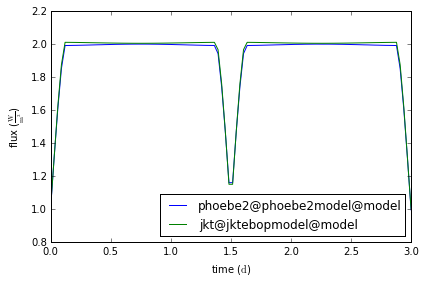

In [10]:
axs, artists = b['lc01@phoebemodel'].plot()
axs, artists = b['lc01@jktebopmodel'].plot()
leg = plt.legend(loc=4)

Now let's plot the residuals between these two models

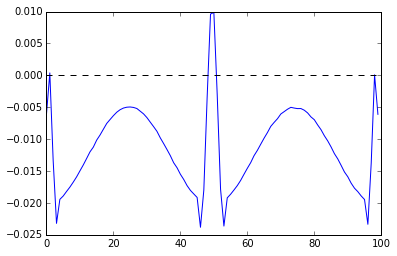

In [11]:
artist, = plt.plot(b.get_value('flux@lc01@phoebemodel') - b.get_value('flux@lc01@jktebopmodel'))
artist = plt.axhline(0.0, linestyle='dashed', color='k')

In [12]:
#axs, artists = b['rv01@phoebemodel'].plot()
#axs, artists = b['rv01@jktebopmodel'].plot()
# TODO: jktebop backend does not currently support RVs, but it should be possible to add support